# 流程化对问卷调查中客户回答的文本意见进行处理信息挖掘

**主要目标包括：**

- （1）将杂乱文本进行预处理，形成有效信息；

- （2）将有效信息进行拆解，归纳主要意见；

- （3）将主要意见进行主题划分，在意见中寻找深层的需求。

# 1 文本预处理

## 1.1 文本去噪

- 一份原始的文字语料中往往有很多干扰信息，包括标点符号、数字、英文字母、转换符等噪声，这些是首先要删除的。

In [1]:
import pandas as pd
import re

inputfile0 = 'q_0.txt'  # 评论提取后保存路径
outputfile1 = 'q_1.txt'  # 评论处理后保存路径

In [2]:
data = pd.read_csv(inputfile0, encoding='utf-8',
                   header=None)  # 文本来源为”对于某银行现有产品和服务体系，您有何改进建议？”
filelist = list(data[0])
filelist2 = []
filelist

['希望1优惠更多一些，活动时间久一些，这样才会吸引到越来越多的人来',
 '越来越好越来越好越来越近越来越好越来越近',
 '希望信用卡可以多拓展优惠场景，比如餐饮购物，尤其北京上海地区。加油信用卡非常有吸引力对有车族，也希望可以在更多地区推广加油卡，推广加油2优惠！',
 '财富计划额度小，购买太快，时间需要自己定制闹钟查询，经常买不到',
 '希望银行能有更多的理财产品，尤其是财富计划理财份额多一些。',
 '直销银行的财富计划太难买到，每次上去都是没有额度。而且没有时间提示。',
 '建议就是多3推出一些与中石油的加油站相关的加油优惠活动',
 '希望行的地方能星期六或星期天开放一天办理业务，平常没时间星期六、日还不开放很不放便。',
 '银行8产品服务公众号宣传运营银行航空',
 '理财产品加强，种类多一些让客户的选择更多一些。',
 '加强理财产品知识的选传给客户多一点的回馈\\n',
 '我个人觉得都挺好的，暂时没有什么要改的地方，',
 '有时候办业务的时候等的时间太久，人多的时候多开几个窗口办理业务',
 '我觉得我个人觉得银行挺好的，利率比任何一个银行的利都要高，我喜欢银行',
 '建议办理业务的时候人多的时候多开几个窗口',
 '对于银行现有的理财产品，我希望更多一些！有按日，按周，按月，按年的保本理财！',
 '应该多亲民一些，发布利率更好更高的产品。也不应该限制数量，应多发布',
 '王舒老师你好你好亲爱的老公老公的那个女的就是不知道有没有什么办法就是',
 '很好好的很好好的很好好的很好好的很好好的很好好的很好好的很好好的很好好的',
 '满意觉得机械基础家常菜聚哈v句就刺激相机相机学习机吃鸡鸡吃鸡刺激吃鸡',
 '等你感觉非常不错，给人与众不同的一种方面的感觉吧！',
 '无改进，都好好好好好好好好好好好好好好好好好好好，了没有好报了',
 '因为他好，他可以保护我的资金非常好。投资没有风险。继续加油，继续努力。',
 '开展活动记得记得就地解决都觉得解答解答金卡打卡',
 '主要是汽油方面吗，选择的原因是因为银行太方便了，所以选择了，',
 '很多人不知道多宣传银行的金融服务，多做点广告宣传银行的金融业务',
 '对于银行现有产品和服务体系，建议做好准备去',
 '和四大银行相对比的优势。比如储蓄利率，那种银行的基金项目。。。',
 

- 文本去噪的方法主要是利用re库中的sub函数，进行英文、数字和特殊字符的删除。

In [3]:
r='[\s+\.!\/_,$%^*(+\"\')]+|[:：+——()?【】“”！，。？、~@#￥%……&*（）]+'  # 删除标点
r1='[^\u4e00-\u9fa5]'  # 删除英文和数字

for a_string in filelist:
    a_string=str(a_string)
    temp = re.sub(r,'',a_string)   #替换法删除标点符号
    temp = re.sub(r1,'',temp)   #替换法删除英文和数字
    filelist2.append(temp)

In [4]:
filelist3 = pd.DataFrame(filelist2)
filelist3.to_csv(outputfile1, index=False, header=False, encoding='utf-8-sig')
filelist3

,0
0,希望优惠更多一些活动时间久一些这样才会吸引到越来越多的人来
1,越来越好越来越好越来越近越来越好越来越近
2,希望信用卡可以多拓展优惠场景比如餐饮购物尤其北京上海地区加油信用卡非常有吸引力对有车族也希望...
3,财富计划额度小购买太快时间需要自己定制闹钟查询经常买不到
4,希望银行能有更多的理财产品尤其是财富计划理财份额多一些
5,直销银行的财富计划太难买到每次上去都是没有额度而且没有时间提示
6,建议就是多推出一些与中石油的加油站相关的加油优惠活动
7,希望行的地方能星期六或星期天开放一天办理业务平常没时间星期六日还不开放很不放便
8,银行产品服务公众号宣传运营银行航空
9,理财产品加强种类多一些让客户的选择更多一些


## 1.2 文本去重
**文本去重包括两个部分，即重复语句删除和重复词压缩** 


### 1.2.1 重复语句删除

- 即去掉文本中重复的部分，这是是获得干净的文本数据后的第一步处理。进行文本去重后，可以删去无效和重复的信息，有助于筛选出有意义的意见

***为了尽量保留有用的信息，一般采用比较删除法，通过在重复文字中筛选保留其中1条***

In [5]:
inputfile = 'q_1.txt' #评论提取的保存路径
outputfile = 'q_2.txt' #评论处理后保存路径
data = pd.read_csv(inputfile, encoding = 'utf-8', header = None)
data.head(5)

,0
0,希望优惠更多一些活动时间久一些这样才会吸引到越来越多的人来
1,越来越好越来越好越来越近越来越好越来越近
2,希望信用卡可以多拓展优惠场景比如餐饮购物尤其北京上海地区加油信用卡非常有吸引力对有车族也希望...
3,财富计划额度小购买太快时间需要自己定制闹钟查询经常买不到
4,希望银行能有更多的理财产品尤其是财富计划理财份额多一些


In [6]:
l1 = len(data) # 去重前数量
data = pd.DataFrame(data[0].unique())  # .unique()提取不重复的内容
l2 = len(data)
data.to_csv(outputfile, index = False, header = False, encoding = 'utf-8-sig')
print(u'删除了%s条记录。' %(l1 - l2))

删除了2条记录。


### 1.2.2 重复词压缩

- 重复词压缩的原因，主要是在线问卷调查时，往往有最少字数要求。所以客户往往会复制粘贴很多同样的词。

- 重复词压缩也称为机械压缩，主要原理就是通过分析前后、中间重复的语料，进行重复词的压缩处理。

In [7]:
import pandas as pd

inputfile3 = u'q_2.txt'  #评论处理的保存路径
outputfile3 = u'q_3.txt'  #评论处理后保存路径

data = pd.read_csv(inputfile3, header=None)
filelist = list(data[0])
filelist2 = []

In [8]:
import find_chinese as wenben  # 导入自定义机械压缩模块

j=0
for a_string in filelist:
    a_string=str(a_string)
    temp1 = a_string.strip('\n')
    temp2 = temp1.lstrip('\ufeff')
    temp3 = temp2.strip('\r')
    temp4 = wenben.find_chinese(temp3)
    temp5 = ""
    if temp4!='':
        temp5 = wenben.delete_copy(temp4)           
    filelist2.append(temp5)

In [9]:
filelist3 =  pd.DataFrame(filelist2)
filelist3.to_csv(outputfile3, index = False, header = False,encoding = 'utf-8-sig')
filelist3.head(5)

,0
0,希望优惠更多一些活动时间久一些这样才会吸引到越来越多的人来
1,越来越好越来越近越来越好越来越近
2,希望信用卡可以多拓展优惠场景比如餐饮购物尤其北京上海地区加油信用卡非常有吸引力对有车族也希望...
3,财富计划额度小购买太快时间需要自己定制闹钟查询经常买不到
4,希望银行能有更多的理财产品尤其是财富计划理财份额多一些



## 1.3 短句删除
- 完成重复词压缩后，还存在一些短句字数过少，这也是没有意义的意见。最后还要对字数过少的句子删除。

- 短句删除的原理就是设定意见字数的下限（这里是4个字符），将小于这个下限的语料删除。

In [10]:
inputfile4 = 'q_3.txt' #输入
outputfile4 = 'q_4.txt' #输出
data = pd.read_csv(inputfile4, encoding = 'utf-8', header = None)
filelist =  list(data[0])
filelist2 = []
filelist

['希望优惠更多一些活动时间久一些这样才会吸引到越来越多的人来',
 '越来越好越来越近越来越好越来越近',
 '希望信用卡可以多拓展优惠场景比如餐饮购物尤其北京上海地区加油信用卡非常有吸引力对有车族也希望可以在更多地区推广加油卡推广加油优惠',
 '财富计划额度小购买太快时间需要自己定制闹钟查询经常买不到',
 '希望银行能有更多的理财产品尤其是财富计划理财份额多一些',
 '直销银行的财富计划太难买到每次上去都是没有额度而且没有时间提示',
 '建议就是多推出一些与中石油的加油站相关的加油优惠活动',
 '希望行的地方能星期六或星期天开放一天办理业务平常没时间星期六日还不开放很不放便',
 '银行产品服务公众号宣传运营银行航空',
 '理财产品加强种类多一些让客户的选择更多一些',
 '加强理财产品知识的选传给客户多一点的回馈',
 '我个人觉得都挺好的暂时没有什么要改的地方',
 '有时候办业务的时候等的时间太久人多的时候多开几个窗口办理业务',
 '我觉得我个人觉得银行挺好的利率比任何一个银行的利都要高我喜欢银行',
 '建议办理业务的时候人多的时候多开几个窗口',
 '对于银行现有的理财产品我希望更多一些有按日按周按月按年的保本理财',
 '应该多亲民一些发布利率更好更高的产品也不应该限制数量应多发布',
 '王舒老师你好亲爱的老公的那个女的就是不知道有没有什么办法就是',
 '很好的',
 '满意觉得机械基础家常菜聚哈句就刺激相机学习机吃鸡鸡吃鸡刺激吃鸡',
 '等你感觉非常不错给人与众不同的一种方面的感觉吧',
 '无改进都好好了没有好报了',
 '因为他好他可以保护我的资金非常好投资没有风险继续加油继续努力',
 '开展活动记得就地解决都觉得解答金卡打卡',
 '主要是汽油方面吗选择的原因是因为银行太方便了所以选择了',
 '很多人不知道多宣传银行的金融服务多做点广告宣传银行的金融业务',
 '对于银行现有产品和服务体系建议做好准备去',
 '和四大银行相对比的优势比如储蓄利率那种银行的基金项目',
 '希望银行能为老百姓更好提供更好的理财产品',
 '继续努力',
 '建议更加优化网点增加服务内容多多互动',
 '非常满意的一次非常满意',
 '银行现有产品服务体系非常有助于改进',
 '服务态度好解决问题方便会推荐更多朋友使用',
 '很很好好很

In [11]:
for a_string in filelist:
    a_string=str(a_string)
    if(a_string == ''):
        continue
    else:
        if(len(a_string)<4):
            continue
        else:
            filelist2.append(a_string)  # 只有当内容不为空且字节数大于4，才加入列表

In [12]:
filelist3 =  pd.DataFrame(filelist2)
filelist3.to_csv(outputfile4, index = False, header = False, encoding = 'utf-8-sig')    


# 2 文本分词与统计

- 为了对意见进行分析，需要将短句划分为词，即将连续的字序列按照一定的规范重新组合成词序列的过程。接着，通过高频率词组进行统计，就可以掌握客户的主要意见。

## 2.1 文本分词

In [13]:
import collections
import pandas as pd
import jieba #导入结巴分词
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# 建立停用词列表
def stopwordslist(filepath):
    stopwords= open(filepath,encoding = 'utf-8').read()
    stopwords=jieba.cut(stopwords, cut_all = True)
    stopwords2 = "\n ".join(stopwords)
    return stopwords2

In [15]:
def movestopwords(sentence):
    stopwords = stopwordslist('stoplist.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence.split("\n"):
        if word not in stopwords:
            if word != '\t' and '\n':
                outstr += word  # 字符串依次加入输出
    return outstr

In [17]:
inputfile5 = u'q_4.txt'  #输入
outputfile5 = u'q_5.txt'  #输出

text = open(inputfile5, encoding='utf-8').read()
wordlist_text = jieba.cut(text, cut_all=True)
wl_space_split = "\n ".join(wordlist_text)
listcontent = movestopwords(wl_space_split)
listcontent

' 希望 优惠 更多 多一些 活动 时间 久 吸引 引到 越多 越来越近 越来越近 希望 信用 信用卡 拓展 优惠 场景 餐饮 购物 尤其 北京 上海 上海地区 海地 地区 加油 信用 信用卡 常有 吸引 吸引力 引力 有车族 车族 希望 更多 地区 推广 广加 加油 加油卡 推广 广加 加油 优惠 财富 计划 额度 小 购买 太 时间 需要 定制 闹钟 查询 买不到 不到 希望 银行 更多 理财 理财产品 财产 产品 尤其 财富 计划 理财 份额 多一些 直销 银行 财富 计划 太 买到 每次 额度 有时 时间 提示 建议 推出 中石 石油 加油 加油站 相关 加油 优惠 优惠活动 活动 希望 行 地方 星期 星期六 星期 星期天 天开 开放 一天 办理 业务 平常 时间 星期 星期六 六日 开放 不放 银行 产品 服务 公众 号 宣传 运营 银行 航空 理财 理财产品 财产 产品 加强 种类 多一些 客户 选择 更多 多一些 加强 理财 理财产品 财产 产品 知识 选 传给 客户 多一点 回馈 觉得 挺 暂时 改 地方 有时 有时候 办 业务 时间 太久 几个 窗口 办理 业务 觉得 觉得 银行 挺 利率 银行 利 喜欢 银行 建议 议办 办理 业务 几个 窗口 银行 现有 理财 理财产品 财产 产品 希望 更多 多一些 周 月 保本 理财 应该 民 发布 布利 利率 更好 产品 不应 应该 限制 数量 应 多发 发布 王 舒 老师 你好 亲爱 老公 女 知道 有没有 办法 满意 觉得 机械 基础 家常 家常菜 聚 句 刺激 相机 学习 学习机 吃 鸡鸡 吃 鸡 刺激 吃 鸡 感觉 与众不同 一种 感觉 改进 好了没 报 保护 资金 投资 风险 继续 续加 加油 继续 努力 开展 开展活动 活动 记得 就地解决 解决 觉得 解答 金 卡 打卡 主要 汽油 选择 原因 是因为 银行 太 方便 选择 人不知 知道 宣传 银行 金融 金融服务 服务 做 广告 广告宣传 宣传 银行 金融 金融业 金融业务 业务 银行 现有 有产 产品 和服 服务 服务体系 体系 建议 做好 准备 四大 银行 行相 对比 优势 储蓄 利率 那种 银行 基金 基金项目 项目 希望 银行 老百姓 百姓 更好 提供 更好 理财 理财产品 财产 产品 继续 努力 建议 优化 网点 增加 服务 内

## 2.2 统计词频

In [19]:
str1 = listcontent.split(" ")
listcontent1 = pd.DataFrame(str1)
listcontent1.to_csv(outputfile5,
                    index=False,
                    header=False,
                    encoding='utf-8-sig')

q = collections.Counter(str1)
dataq = pd.DataFrame(q.items())
dataq.to_excel("q5.xlsx", header=False, encoding='utf-8-sig')
dataq.head(10)

,0,1
0,,1
1,希望,7
2,优惠,4
3,更多,6
4,多一些,5
5,活动,3
6,时间,5
7,久,1
8,吸引,2
9,引到,1


## 2.3 生成词云

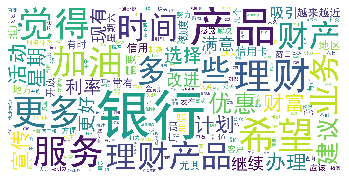

In [20]:
outputfile = 'ciyun.jpg'
my_wordcloud = WordCloud(
    background_color='white',  # 设置背景颜
    #mask = abel_mask,        # 设置背景图片
    max_words=2000,  # 设置最大现实的字数
    #stopwords=stopwordlist,     # 设置停用词
    collocations=False,
    #max_font_size=50,          # 设置字体最大值
    #random_state=30,          # 设置有多少种配色方案
    #width=2000,
    #height=1200,
    font_path='simhei.ttf',  # 设置字体格式，如不设置显示不了中文
    scale=4).generate(listcontent)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file(outputfile)

# 3 LDA主题分析
***LDA（Latent Dirichlet Allocation）是一种文档主题生成模型，能够挖掘数据集中的潜在主题，进而有助于分析文本内容的关注点。***
- 主题分析是通过机器学习和自然语言处理等方法在大量的文本中自动抽象出主题的一种统计模型。这类模型要考虑到文本背后的语义关联的关系，发现文本词语的规律，实现在非结构化的文本中找到有效的信息。


In [28]:
from gensim import corpora, models  # 导入词袋模型

inputfile = u'q_5.txt'
outputfile = u'q_6.txt'
inputfile = pd.read_csv(inputfile, encoding='utf-8', header=None)  #读入数据

In [29]:
inputfile.drop(inputfile.index[0], inplace=True)
inputfile

,0
1,希望
2,优惠
3,更多
4,多一些
5,活动
...,...
350,使用
351,挺
352,需要
353,改进


In [31]:
inputfile[1] = inputfile[0].apply(lambda s: s.split(' ')) #定义一个分割函数，然后用apply广播

**主题分析**

- 当收集的客户意见数量较多时，还需要通过科学的方法来归类。

In [48]:
inputfile_dict = corpora.Dictionary(inputfile[1]) #建立词典
inputfile_corpus = [inputfile_dict.doc2bow(i) for i in inputfile[1]] #建立语料库
inputfile_lda = models.LdaModel(inputfile_corpus, num_topics = 4, id2word = inputfile_dict) #LDA模型训练，将意见分为三类主题

In [49]:
filelist = []
for i in range(4):
    filelist.append(inputfile_lda.print_topic(i))
    print (inputfile_lda.print_topic(i)) #输出每个主题
    

filelist1 =  pd.DataFrame(filelist)
filelist1.to_csv(outputfile, index = False, header = False, encoding = 'utf-8-sig')  

0.046*"觉得" + 0.045*"加油" + 0.038*"时间" + 0.024*"办理" + 0.024*"活动" + 0.017*"理财" + 0.017*"星期" + 0.017*"鸡" + 0.017*"有产" + 0.017*"越来越近"
0.090*"银行" + 0.055*"产品" + 0.031*"多一些" + 0.020*"满意" + 0.019*"建议" + 0.019*"选择" + 0.019*"继续" + 0.019*"改进" + 0.019*"宣传" + 0.014*"业务"
0.042*"更多" + 0.035*"理财产品" + 0.022*"吃" + 0.022*"挺" + 0.022*"更好" + 0.021*"现有" + 0.016*"希望" + 0.015*"体系" + 0.015*"解决" + 0.015*"财富"
0.043*"服务" + 0.037*"希望" + 0.036*"理财" + 0.036*"财产" + 0.029*"优惠" + 0.023*"业务" + 0.023*"计划" + 0.022*"太" + 0.016*"信用" + 0.016*"方便"


In [50]:
filelist1


,0
0,"0.046*""觉得"" + 0.045*""加油"" + 0.038*""时间"" + 0.024*""..."
1,"0.090*""银行"" + 0.055*""产品"" + 0.031*""多一些"" + 0.020*..."
2,"0.042*""更多"" + 0.035*""理财产品"" + 0.022*""吃"" + 0.022*..."
3,"0.043*""服务"" + 0.037*""希望"" + 0.036*""理财"" + 0.036*""..."


- 主题1中筛选的有效的主题词，主要反映了客户对产品的时间方面的意见

- 主题2和3中筛选的有效的主题词，主要反映了客户希望理财产品的收益水平更大一些，种类多一些。

- 主题3中筛选的有效的主题词，主要反映了客户希望投资理财的服务需改进，开展更多的理财活动。 